# Classification non supervisée avec le KMEANS


Dans ce notebook, nous allons explorer la classification en utilisant le modèle de KMeans

### Étape 1: Import des bibliothèques nécessaires
Commençons par importer les bibliothèques Python nécessaires pour notre analyse.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

### Étape 2: Chargement des données
Ensuite, nous allons charger notre ensemble de données à partir de scikit-learn (iris dataset). Vous pouvez remplacer cette étape par le chargement de votre propre ensemble de données en utilisant les méthodes appropriées.

In [2]:
#Import du fichier généré via KNIME avec 2 colonnes : DATE et id
data = pd.read_csv('WORLD_elephants_ID_DATES_TAX_LONG_LAT.csv')

In [3]:
#Import du fichier généré via KNIME avec 2 colonnes : DATE et id
# data = pd.read_csv('WORLD_ID_DATES_TAX_LONG_LAT.csv')

In [4]:
# data.groupby(["Taxon"])['id'].count() 

In [5]:
# # Créer un dictionnaire de correspondance entre les anciennes et les nouvelles valeurs
# taxon_mapping = {
#     4733: '1',
#     7018: '2',
#     9196: '3',
#     11901: '4',
#     13858: '5',
#     144849: '6',
#     203153: '7',
#     891696: '8'
# }

# data['Taxon'] = data['Taxon'].replace(taxon_mapping)

# data['Taxon'] = data['Taxon'].astype('int64')

In [6]:
# data = data[data['Taxon'] == 48662]

In [7]:
data

,id,Date,Taxon,Latitude,Longitude
0,44359560,2017-10-18,43694,-22.741703,31.023569
1,66535875,2019-09-11,43694,-13.056733,31.603620
2,9636,2010-03-10,43694,-25.020364,31.526569
3,44362161,2009-11-19,43694,-25.390285,31.568492
4,44362616,2009-11-19,43694,-25.305360,31.519588
...,...,...,...,...,...
10883,22155504,2019-04-06,43694,0.234390,37.539736
10884,22155892,2019-04-06,43694,0.583683,37.631653
10885,22156416,2017-08-01,43694,2.215427,31.452052
10886,22156444,2017-08-01,43694,2.347300,31.426921


In [8]:
data

,id,Date,Taxon,Latitude,Longitude
0,44359560,2017-10-18,43694,-22.741703,31.023569
1,66535875,2019-09-11,43694,-13.056733,31.603620
2,9636,2010-03-10,43694,-25.020364,31.526569
3,44362161,2009-11-19,43694,-25.390285,31.568492
4,44362616,2009-11-19,43694,-25.305360,31.519588
...,...,...,...,...,...
10883,22155504,2019-04-06,43694,0.234390,37.539736
10884,22155892,2019-04-06,43694,0.583683,37.631653
10885,22156416,2017-08-01,43694,2.215427,31.452052
10886,22156444,2017-08-01,43694,2.347300,31.426921


In [9]:
# # Exemple avec les données Iris de scikit-learn
# from sklearn.datasets import load_iris

# # Chargement des données Iris
# iris = load_iris()

# type(iris)

In [10]:
# iris

In [11]:
# Création d'un DataFrame pandas à partir des données
# data = pd.DataFrame(iris.data, columns = iris.feature_names)

## Étape 3: Exploration des données
Avant de construire notre modèle, il est important de comprendre nos données. Nous pouvons utiliser différentes méthodes pour explorer et analyser les données, telles que head(), info(), describe(), etc.

In [12]:
# Afficher les premières lignes des données
data.head()

,id,Date,Taxon,Latitude,Longitude
0,44359560,2017-10-18,43694,-22.741703,31.023569
1,66535875,2019-09-11,43694,-13.056733,31.603620
2,9636,2010-03-10,43694,-25.020364,31.526569
3,44362161,2009-11-19,43694,-25.390285,31.568492
4,44362616,2009-11-19,43694,-25.305360,31.519588


In [13]:

data.drop('id', axis=1, inplace=True)

data.drop('Taxon', axis=1, inplace=True)

In [14]:
data.describe()

,Latitude,Longitude
count,10857.000000,10857.000000
mean,-10.934529,36.890381
std,15.701913,23.434538
min,-34.489672,-4.737951
25%,-24.464118,25.754173
50%,-17.832490,31.645270
75%,0.168603,36.010680
max,30.106259,118.731024


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10888 entries, 0 to 10887
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10888 non-null  object 
 1   Latitude   10857 non-null  float64
 2   Longitude  10857 non-null  float64
dtypes: float64(2), object(1)
memory usage: 255.3+ KB


##Etape 4 : Prétraitement des données : normalisation des données

In [16]:

# Supposons que "df" est votre DataFrame et "date" est la colonne contenant les dates
data['Date'] = pd.to_datetime(data['Date'])  # Convertir la colonne en format de date

# Extraire les composantes temporelles
data['month'] = data['Date'].dt.month

# Supprimer la colonne originale "date" si nécessaire
data.drop('Date', axis=1, inplace=True)




In [17]:
data

,Latitude,Longitude,month
0,-22.741703,31.023569,10
1,-13.056733,31.603620,9
2,-25.020364,31.526569,3
3,-25.390285,31.568492,11
4,-25.305360,31.519588,11
...,...,...,...
10883,0.234390,37.539736,4
10884,0.583683,37.631653,4
10885,2.215427,31.452052,8
10886,2.347300,31.426921,8


In [18]:
data.describe()

,Latitude,Longitude,month
count,10857.000000,10857.000000,10888.000000
mean,-10.934529,36.890381,6.678453
std,15.701913,23.434538,3.317625
min,-34.489672,-4.737951,1.000000
25%,-24.464118,25.754173,4.000000
50%,-17.832490,31.645270,7.000000
75%,0.168603,36.010680,9.000000
max,30.106259,118.731024,12.000000


In [19]:
data.dropna(inplace=True)

In [20]:
data.describe()

,Latitude,Longitude,month
count,10857.000000,10857.000000,10857.000000
mean,-10.934529,36.890381,6.677259
std,15.701913,23.434538,3.317196
min,-34.489672,-4.737951,1.000000
25%,-24.464118,25.754173,4.000000
50%,-17.832490,31.645270,7.000000
75%,0.168603,36.010680,9.000000
max,30.106259,118.731024,12.000000


In [21]:
#Normalisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
X_normalized = scaler.transform(data)


In [22]:
# X_normalized

## Étape 5 : application du modèle KMeans
Avant de construire notre modèle, nous devons préparer nos données. Cela implique généralement la division de l'ensemble de données en ensembles d'entraînement et de test, ainsi que la séparation des fonctionnalités et des étiquettes.

In [23]:
# Division des données en ensembles d'entraînement (80%) et de test depuis les données normalisées
# X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [24]:
# Initialisation du classifieur de l'arbre de décision
# kmeans = KMeans(n_clusters=3, n_init=100, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=200)
# Entraînement du modèle sur l'ensemble d'entraînement
kmeans.fit(X_normalized)

c:\Users\Pauline\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Pauline\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=2, n_init=200, random_state=42)

## Étape 6: Évaluation du modèle
Une fois que notre modèle est entraîné, nous pouvons l'évaluer en utilisant l'ensemble de test.

In [25]:
inertia = kmeans.inertia_
inertia

19227.262905145104

In [26]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_normalized, kmeans.labels_)
silhouette_avg

0.5185414568837623

## Étape 7: Visualisation des clusters

In [27]:
data.head()

,Latitude,Longitude,month
0,-22.741703,31.023569,10
1,-13.056733,31.603620,9
2,-25.020364,31.526569,3
3,-25.390285,31.568492,11
4,-25.305360,31.519588,11


In [28]:
kmeans.cluster_centers_

array([[-0.2619463 , -0.3796847 ,  0.03483185],
       [ 1.50448289,  2.18071082, -0.20005599]])

In [29]:
X_original = scaler.inverse_transform(X_normalized)

In [30]:
clusters_original = scaler.inverse_transform(kmeans.cluster_centers_)

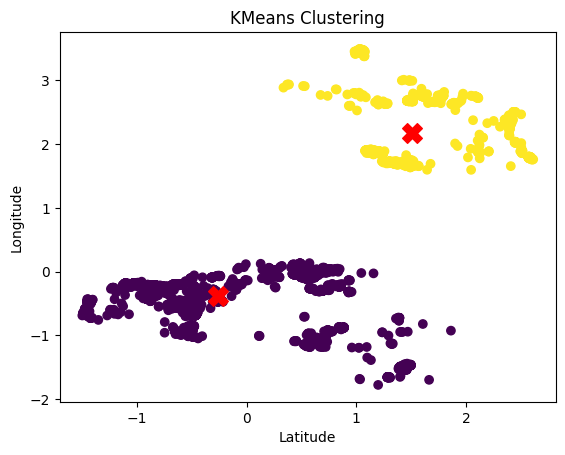

In [31]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='red', s=200)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('KMeans Clustering')
plt.show()

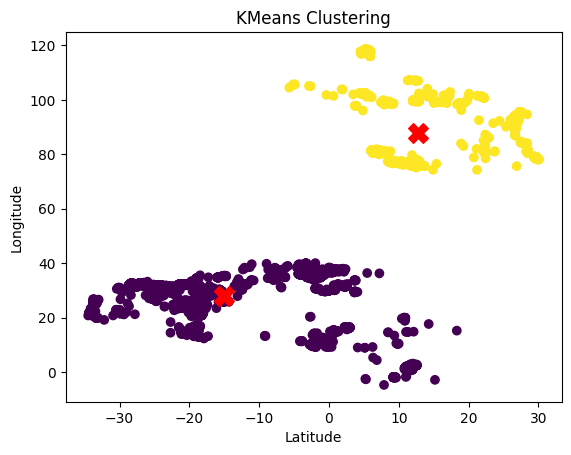

In [32]:
plt.scatter(X_original[:, 0], X_original[:, 1], c=kmeans.labels_)
plt.scatter(clusters_original[:, 0], clusters_original[:, 1], marker='X', color='red', s=200)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('KMeans Clustering')
plt.show()

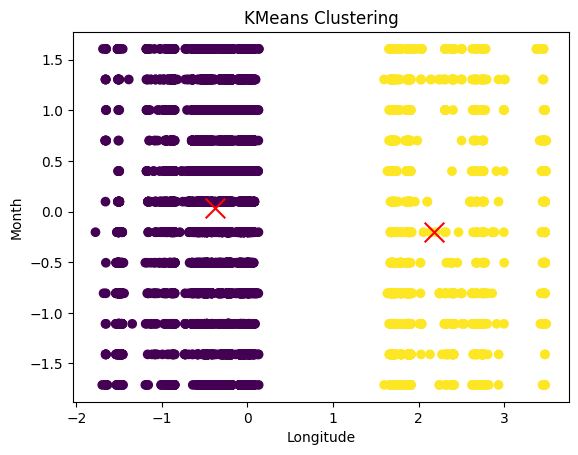

In [33]:
plt.scatter(X_normalized[:, 1], X_normalized[:, 2], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', color='red', s=200)
plt.xlabel('Longitude')
plt.ylabel('Month')
plt.title('KMeans Clustering')
plt.show()

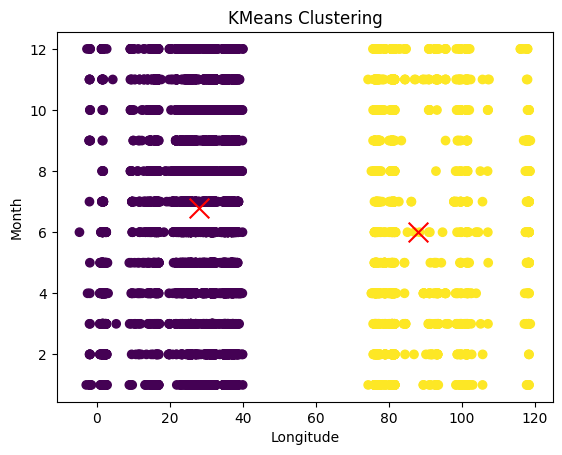

In [34]:
plt.scatter(X_original[:, 1], X_original[:, 2], c=kmeans.labels_)
plt.scatter(clusters_original[:, 1], clusters_original[:, 2], marker='x', color='red', s=200)
plt.xlabel('Longitude')
plt.ylabel('Month')
plt.title('KMeans Clustering')
plt.show()

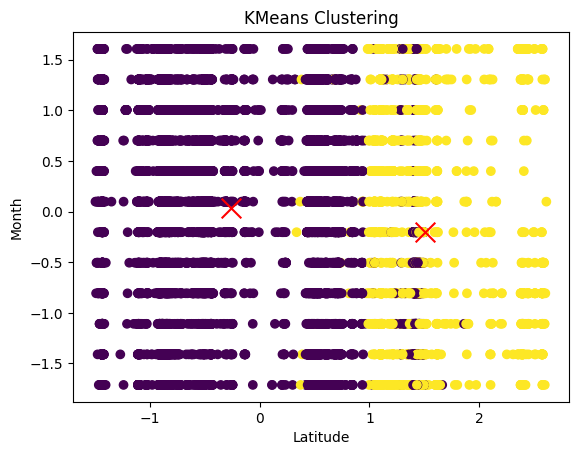

In [35]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 2], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], marker='x', color='red', s=200)
plt.xlabel('Latitude')
plt.ylabel('Month')
plt.title('KMeans Clustering')
plt.show()

##Etape 8 :  Vérification du nombre K de clusters (retrouver k=3 par la méthode du coude)

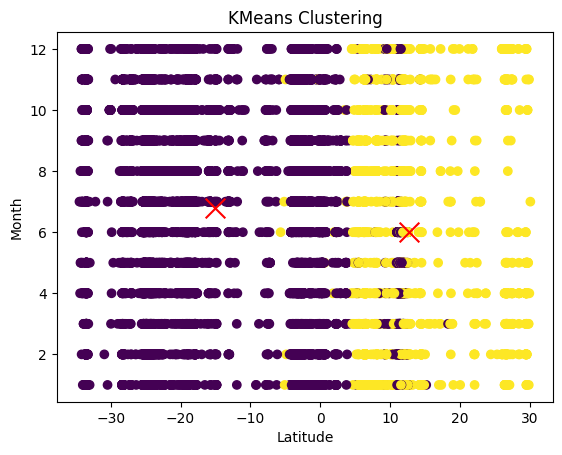

In [36]:
plt.scatter(X_original[:, 0], X_original[:, 2], c=kmeans.labels_)
plt.scatter(clusters_original[:, 0], clusters_original[:, 2], marker='x', color='red', s=200)
plt.xlabel('Latitude')
plt.ylabel('Month')
plt.title('KMeans Clustering')
plt.show()

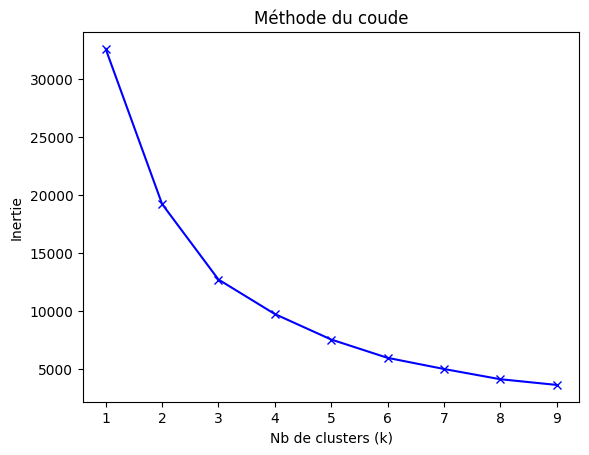

In [37]:
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=200, random_state=45)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Nb de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

In [38]:
X_normalized

array([[-0.75199228, -0.25036048,  1.00171784],
       [-0.13516196, -0.22560736,  0.70024451],
       [-0.89711892, -0.22889543, -1.10859551],
       ...,
       [ 0.83751334, -0.23207537,  0.39877117],
       [ 0.84591223, -0.23314783,  0.39877117],
       [ 0.83830678, -0.23427514,  0.39877117]])

In [39]:
X_original

array([[-22.74170268,  31.02356902,  10.        ],
       [-13.05673271,  31.60362043,   9.        ],
       [-25.02036375,  31.52656943,   3.        ],
       ...,
       [  2.21542704,  31.45205239,   8.        ],
       [  2.3472996 ,  31.42692093,   8.        ],
       [  2.22788497,  31.40050425,   8.        ]])

In [40]:
del X_normalized
del X_original
del clusters_original

In [41]:
del inertia